In [1]:
# Check device number
!ls -ltrh /dev/video*

ls: cannot access '/dev/video*': No such file or directory


Looking for faces in seth1.jpg


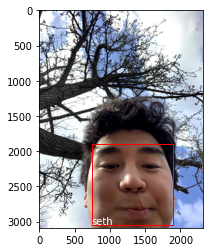

Looking for faces in seth10.jpg


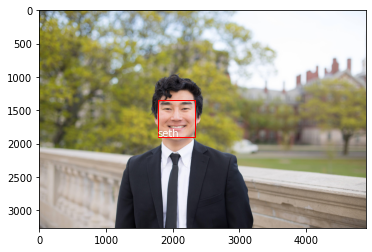

Looking for faces in seth11.jpg


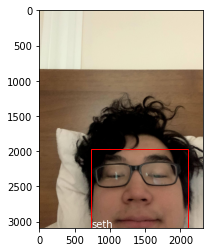

In [6]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np 
import os 
import glob
import re
from pigeon import annotate
# from IPython.display import display, Image

from modules.heic_to_jpg import convert_heic_to_jpg_from_directory
from modules.face_detection import face_detection_from_source_folder
from modules.data_processing import train_test_split_labeled_data
from modules.data_processing import copy_images_to_new_folder
from modules import face_recog



for image_file in os.listdir("data/images-custom/seth")[0:5]:
    if image_file[len(image_file)-1] != 'g':
        continue
    full_file_path = os.path.join("data/images-custom/seth", image_file)

    print("Looking for faces in {}".format(image_file))

    # Run predictions
    predictions = face_recog.predict(full_file_path, cropped_face = False, model_path="models/trained_knn_model.clf")

    # Display results overlaid on an image
    img_path = os.path.join("data/images-custom/seth", image_file)
    
    pil_image = Image.open(img_path).convert("RGB")
    figure, ax = plt.subplots(1)
    ax.imshow(np.array(pil_image))
    # draw = ImageDraw.Draw(pil_image)
    for name, (top, right, bottom, left) in predictions:
        # Draw a box around the face using matplotlib
        rect = matplotlib.patches.Rectangle((left,bottom),right - left,top - bottom, edgecolor='r', facecolor="none")
        ax.add_patch(rect)
        # There's a bug in Pillow where it blows up with non-UTF-8 text
        # when using the default bitmap font
        ax.text(left, bottom - 5, name,color='white', fontsize=10)
        
    plt.show()




In [7]:
!pip3 install lime

     |████████████████████████████████| 275 kB 583 kB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 76 kB 3.2 MB/s             
     |████████████████████████████████| 30.2 MB 3.1 MB/s            
     |████████████████████████████████| 6.3 MB 738 kB/s            
     |████████████████████████████████| 1.9 MB 4.7 MB/s            
     |████████████████████████████████| 178 kB 5.5 MB/s            
     |████████████████████████████████| 3.3 MB 5.5 MB/s            
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=f54aba2687d8cdb5869fb65d3607bd3f40ef15bf42a89fc67f794e936d39019d
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [8]:
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

Looking for faces in seth11.jpg


[(1891, 1891, 3042, 741)]

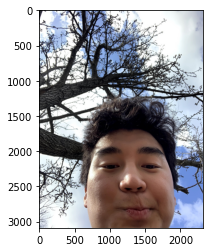

In [ ]:
faces_encodings = face_recognition.face_encodings(X_img, known_face_locations=X_face_locations)

In [ ]:

cropped_face = False
model_path="models/trained_knn_model.clf"

# Run predictions
# Load a trained KNN model (if one was passed in)
if knn_clf is None:
    with open(model_path, 'rb') as f:
        knn_clf = pickle.load(f)

if cropped_face: 
    X_face_locations = [(0, X_img.shape[0], X_img.shape[1], 0)]
else:
    X_face_locations = face_recognition.face_locations(X_img)

# If no faces are found in the image, return an empty result.
if len(X_face_locations) == 0:
    return []

# Find encodings for faces in the test image
faces_encodings = face_recognition.face_encodings(X_img, known_face_locations=X_face_locations)

# Use the KNN model to find the best matches for the test face
closest_distances = knn_clf.kneighbors(faces_encodings, n_neighbors=1)
are_matches = [closest_distances[0][i][0] <= distance_threshold for i in range(len(X_face_locations))]

# Predict classes and remove classifications that aren't within the threshold
return [(pred, loc) if rec else ("unknown", loc) for pred, loc, rec in zip(knn_clf.predict(faces_encodings), X_face_locations, are_matches)]

# Display results overlaid on an image
img_path = os.path.join("data/images-custom/seth", image_file)

pil_image = Image.open(img_path).convert("RGB")
figure, ax = plt.subplots(1)
ax.imshow(np.array(pil_image))
# draw = ImageDraw.Draw(pil_image)
for name, (top, right, bottom, left) in predictions:
    # Draw a box around the face using matplotlib
    rect = matplotlib.patches.Rectangle((left,bottom),right - left,top - bottom, edgecolor='r', facecolor="none")
    ax.add_patch(rect)
    # There's a bug in Pillow where it blows up with non-UTF-8 text
    # when using the default bitmap font
    ax.text(left, bottom - 5, name,color='white', fontsize=10)
        
    plt.show()

explanation = explainer.explain_instance(images[0].astype('double'), model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)

In [31]:
import pickle
def predict_from_array(X_img, cropped_face = True, knn_clf=None, model_path="models/trained_knn_model.clf", distance_threshold=0.6):
    """
    Recognizes faces in given image using a trained KNN classifier
    :param X_img_path: path to image to be recognized
    :param knn_clf: (optional) a knn classifier object. if not specified, model_save_path must be specified.
    :param model_path: (optional) path to a pickled knn classifier. if not specified, model_save_path must be knn_clf.
    :param distance_threshold: (optional) distance threshold for face classification. the larger it is, the more chance
           of mis-classifying an unknown person as a known one.
    :return: a list of names and face locations for the recognized faces in the image: [(name, bounding box), ...].
        For faces of unrecognized persons, the name 'unknown' will be returned.
    """
    if knn_clf is None and model_path is None:
        raise Exception("Must supply knn classifier either thourgh knn_clf or model_path")

    # Load a trained KNN model (if one was passed in)
    if knn_clf is None:
        with open(model_path, 'rb') as f:
            knn_clf = pickle.load(f)
    
    if cropped_face: 
        X_face_locations = [(0, X_img.shape[0], X_img.shape[1], 0)]
    else:
        X_face_locations = face_recognition.face_locations(X_img)
     
    # If no faces are found in the image, return an empty result.
    if len(X_face_locations) == 0:
        return []

    # Find encodings for faces in the test iamge
    faces_encodings = face_recognition.face_encodings(X_img, known_face_locations=X_face_locations)

    # Use the KNN model to find the best matches for the test face
    closest_distances = knn_clf.kneighbors(faces_encodings, n_neighbors=1)
    are_matches = [closest_distances[0][i][0] <= distance_threshold for i in range(len(X_face_locations))]

    # Predict classes and remove classifications that aren't within the threshold
    return knn_clf.predict(faces_encodings)[0]


Looking for faces in data/faces-final/face1.jpg


array([[[  3,   0,   0],
        [  1,   0,   0],
        [  0,   1,   0],
        ...,
        [ 39,  34,  30],
        [ 46,  41,  37],
        [ 98,  93,  89]],

       [[  3,   0,   0],
        [  1,   0,   0],
        [  0,   1,   0],
        ...,
        [ 17,  12,   8],
        [ 25,  20,  16],
        [ 46,  41,  37]],

       [[  3,   0,   0],
        [  2,   1,   0],
        [  0,   1,   0],
        ...,
        [  8,   3,   0],
        [  4,   0,   0],
        [107, 102,  98]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   1,   0],
        [  0,   0,   0],
        [  1,   0,   2]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  1,   0,   2]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  1,   0,   2]]

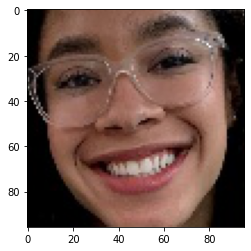

In [67]:

import cv2
import face_recognition
full_file_path = os.path.join("data/faces-final/", "face1.jpg")

print("Looking for faces in {}".format(full_file_path))

# Load image file and find face locations
X_img =  np.array(Image.open(full_file_path).convert('RGB'))
# img = X_img[:,:,::-1]
plt.imshow(X_img)

predict_from_array(X_img)

X_img

In [69]:
explanation = explainer.explain_instance(X_img, predict_from_array,  
                                         top_labels=3, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

RuntimeError: Unsupported image type, must be 8bit gray or RGB image.

# USB Camera

In [2]:
from jetcam.usb_camera import USBCamera
from jetcam.csi_camera import CSICamera


# for USB Camera (Logitech C270 webcam), uncomment the following line
camera = USBCamera(width=224, height=224, capture_device=0) # confirm the capture_device number

distance_threshold=0.6
# for CSI Camera (Raspberry Pi Camera Module V2), uncomment the following line
# camera = CSICamera(width=224, height=224, capture_device=0) # confirm the capture_device number

camera.running = True
print("camera created")

ModuleNotFoundError: No module named 'jetcam'

In [ ]:
import pickle

# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True
face_lst = []


distance_threshold=0.6


# Load a trained KNN model (if one was passed in)

with open("models/trained_knn_model.clf", 'rb') as f:
    knn_clf = pickle.load(f)

# Widgets

### Create Camera Widget 

In [ ]:
import ipywidgets
import traitlets
from IPython.display import display
from jetcam.utils import bgr8_to_jpeg

# initialize active dataset
# dataset = datasets[DATASETS[0]]

# unobserve all callbacks from camera in case we are running this cell for second time
camera.unobserve_all()

# create image preview
camera_widget = ipywidgets.Image()
traitlets.dlink((camera, 'value'), (camera_widget, 'value'), transform=bgr8_to_jpeg)



# # create widgets
# dataset_widget = ipywidgets.Dropdown(options=DATASETS, description='dataset')
# category_widget = ipywidgets.Dropdown(options=dataset.categories, description='category')
# count_widget = ipywidgets.IntText(description='count')
# save_widget = ipywidgets.Button(description='add')

# # manually update counts at initialization
# count_widget.value = dataset.get_count(category_widget.value)

# # sets the active dataset
# def set_dataset(change):
#     global dataset
#     dataset = datasets[change['new']]
#     count_widget.value = dataset.get_count(category_widget.value)
# dataset_widget.observe(set_dataset, names='value')

# # update counts when we select a new category
# def update_counts(change):
#     count_widget.value = dataset.get_count(change['new'])
# category_widget.observe(update_counts, names='value')

# # save image for category and update counts
# def save(c):
#     dataset.save_entry(camera.value, category_widget.value)
#     count_widget.value = dataset.get_count(category_widget.value)
# save_widget.on_click(save)

data_collection_widget = ipywidgets.VBox([
    ipywidgets.HBox([camera_widget])
])

display(data_collection_widget)
print("data_collection_widget created")

### Live execution widget

In [ ]:
import threading
import time
import cv2
import face_recognition


state_widget = ipywidgets.ToggleButtons(options=['stop', 'live'], description='state', value='stop')
prediction_widget = ipywidgets.Text(description='prediction')
score_widgets = []
for category in ['seth', 'jordyn', 'claire']:
    score_widget = ipywidgets.FloatSlider(min=0.0, max=1.0, description=category, orientation='vertical')
    score_widgets.append(score_widget)

def live(state_widget, model, camera, prediction_widget, score_widget):
    global dataset
    while state_widget.value == 'live':
        # image = camera.value

        # Grab a single frame of video
        ret, frame = camera.read()

        # Resize frame of video to 1/4 size for faster face recognition processing
        small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

        # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
        rgb_small_frame = small_frame[:, :, ::-1]

        # Only process every other frame of video to save time
        if process_this_frame:
            # Find all the faces and face encodings in the current frame of video
            face_locations = face_recognition.face_locations(rgb_small_frame)
            face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

            face_names = []
            for idx, face_encoding in enumerate(face_encodings):

                # See if the face is a match for the known face(s)
                # Use the KNN model to find the best matches for the test face
                closest_distances = knn_clf.kneighbors([face_encoding], n_neighbors=1)
                
                are_matches = [closest_distances[0][0][0] <= distance_threshold]

                # Predict classes and remove classifications that aren't within the threshold
                face_lst = [knn_clf.predict([face_encoding]), face_locations[idx] if are_matches else ("unknown", face_locations[idx])]
                
                face_names.append(face_lst[0][0])
                



        process_this_frame = not process_this_frame


        # Display the results
        for (top, right, bottom, left), name in zip(face_locations, face_names):
            # Scale back up face locations since the frame we detected in was scaled to 1/4 size
            top *= 4
            right *= 4
            bottom *= 4
            left *= 4

            # Draw a box around the face
            cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

            # Draw a label with a name below the face
            cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
            font = cv2.FONT_HERSHEY_DUPLEX
            cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)
            

            category_index = output.argmax()
            prediction_widget.value = dataset.categories[category_index]
            for i, score in enumerate(list(output)):
                score_widgets[i].value = score
                
def start_live(change):
    if change['new'] == 'live':
        execute_thread = threading.Thread(target=live, args=(state_widget, model, camera, prediction_widget, score_widget))
        execute_thread.start()

state_widget.observe(start_live, names='value')

live_execution_widget = ipywidgets.VBox([
    ipywidgets.HBox(score_widgets),
    prediction_widget,
    state_widget
])

# display(live_execution_widget)
print("live_execution_widget created")

In [ ]:
!pip install fr_utils
!pip install inception_blocks

In [70]:
import sys
import pandas as pd
from PIL import Image
from fr_utils import *
from inception_blocks import *
from matplotlib.pyplot import figure

%matplotlib qt

from skimage.segmentation import mark_boundaries
from lime.wrappers.scikit_image import SegmentationAlgorithm

# imports for LIME
import sklearn
import sklearn.datasets
import sklearn.ensemble

import lime
import lime.lime_tabular
from lime import lime_image
from __future__ import print_function


# loss function for image encoding comparisons
def triplet_loss(y_true, y_pred, alpha = 0.2):

    anchor, positive, negative = y_pred[0], y_pred[1], y_pred[2]

    # distance between the anchor and the positive
    pos_dist = tf.reduce_sum(tf.square(tf.subtract(anchor,positive)),axis=-1)
    
    # distance between the anchor and the negative
    neg_dist = tf.reduce_sum(tf.square(tf.subtract(anchor,negative)),axis=-1)
    
    # subtract the two previous distances and add alpha.
    basic_loss = tf.add(tf.subtract(pos_dist,neg_dist),alpha)
    
    # maximum of basic_loss and 0.0
    loss = tf.reduce_sum(tf.maximum(basic_loss,0))

    return loss


# given image, returns encoding
def img_to_encoding(img1, model):
    img = img1[...,::-1]
    img = np.around(np.transpose(img, (2,0,1))/255.0, decimals=12)
    x_train = np.array([img])
    embedding = model.predict_on_batch(x_train)
    return embedding


# given image path, returns encoding
def img_path_to_encoding(image_path, model):
    return img_to_encoding(cv2.imread(image_path, 1), model)


# given path to dir with images, fills 'database' with images
def fillDatabase(databasePath, database):
    databasePath = os.fsencode(databasePath)
    if not os.path.exists(databasePath):
        sys.exit('Invalid database path')
        
    for img in os.listdir(databasePath):
        img_path = os.path.join(databasePath, os.fsencode(img))
        database[img.decode('UTF-8')] = img_path_to_encoding(os.fsdecode(img_path), FRmodel)
        

# given list of images, gets probability of each image being 'Greg'
def get_probability(imgs):
    dists = []
    for i in range(len(imgs)):
        # runs image through FaceNet model
        encoding = img_to_encoding(imgs[i], FRmodel)
        
        # calculates distance from 'Greg'
        dist = np.linalg.norm(encoding-database["greg_anchor.jpg"])
        
        # [prob of being Greg, prob of being not Greg]
        dists.append([1-dist, dist])
    return dists


# outputs superpixel features that most significantly contribute to results
def get_explanation(img_path):
    # get image
    inputIMG = cv2.imread(img_path, 1)
    
    res = get_probability([inputIMG])[0]
    if res[0] > .3:
        print("It is Greg!")
    else:
        print("Not a Greg.")

    # get explanation from LIME
    explanation = explainer.explain_instance(inputIMG, 
                                            classifier_fn = get_probability, top_labels=2, 
                                            hide_color=0, num_samples=100, segmentation_fn=segmenter)

    # display top 5 features
    for i in range(5, 0, -1):
        temp, mask = explanation.get_image_and_mask(0, positive_only=False, num_features=i, hide_rest=False)
        plt.figure()
        plt.imshow(mark_boundaries(temp, mask))


# specify model input, compile, then load the weights
FRmodel= faceRecoModel(input_shape=(3, 96, 96))
FRmodel.compile(optimizer = 'adam', loss = triplet_loss, metrics = ['accuracy'])
load_weights_from_FaceNet(FRmodel)


# fill database
database = {}
fillDatabase('images', database)


# init LIME explainer and segmentation function
explainer = lime_image.LimeImageExplainer(verbose = False)
segmenter = SegmentationAlgorithm('slic', n_segments=50, compactness=1, sigma=1)


# see explanations
get_explanation("images/greg_positive.jpg")
get_explanation("images/maxim_positive.jpg")

ModuleNotFoundError: No module named 'fr_utils'